In [1]:
from koopman_probabilistic import *
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

from scipy.stats import norm, skewnorm

In [2]:
import json

with open("GEFCom2017//GEFCom2017-Qual//GEFCom2017Qual2005-2015.json") as f:
    all_data = json.loads(f.read())
    
# x = np.transpose(np.array([all_data["ISONE CA"]["DEMAND"], all_data["ISONE CA"]["DewPnt"], all_data["ISONE CA"]["DryBulb"]], dtype=np.float64))
x = np.transpose(np.array([all_data["ISONE CA"]["DEMAND"]], dtype=np.float64))

In [3]:
x_original = x
mean = np.mean(x, axis=0)
rnge = np.max(x, axis=0) - np.min(x, axis=0)
x = (x - np.matlib.repmat(mean, x.shape[0], 1)) / np.matlib.repmat(rnge, x.shape[0], 1)
print("x", x.shape)

x (96408, 1)


In [4]:
data_name = "isone"

train_through = 365 * 24
train_start = -2 * 365 * 24
x = x[train_start:]
predict_through = train_through + 24 * 31
x = x[:predict_through]
xt = x[:train_through, :]

num_freqs = [6, 6, 6]
num_fourier = 4
mu_file = "forecasts//" + data_name + f"trained{train_start}-{train_through}_{num_freqs}mu.npy"
sigma_file = "forecasts//" + data_name + f"trained{train_start}-{train_through}_{num_freqs}sigma.npy"
alpha_file = "forecasts//" + data_name + f"trained{train_start}-{train_through}_{num_freqs}alpha.npy"
print("x", x.shape)
print("xt", xt.shape)

x (9504, 1)
xt (8760, 1)


In [5]:
model = AlternatingSkewNLL(x_dim=xt.shape[1], num_freqs=num_freqs, n=512)
k = KoopmanProb(model, device='cpu', sample_num=24, num_fourier_modes=num_fourier, batch_size=32)
k.find_fourier_omegas(xt, hard_code=[24, 168, 24 * 365.25 / 12, 24 * 365.25])

tensor([0.2618, 0.0374, 0.0086, 0.0007])

In [16]:
k.fit(xt, iterations=100, interval=10, verbose=True, cutoff=0, weight_decay=1e-10000, lr_theta=1e-3, lr_omega=1e-8, num_slices=None);

Iteration  0
tensor([  24.0000,  168.0238,  730.0179, 8767.5010,   50.1475,   40.7688,
          24.0000,  168.0085,  731.4469, 8794.0195,   21.0679,   19.2112,
          24.0000,  168.0060,  730.5209, 8771.1602,   13.3351,   12.5664])
Setting periods to tensor([  24.0000,  168.0238,  730.0179, 8767.5010,   50.1475,   40.7688,
          24.0000,  168.0085,  731.4469, 8794.0195,   21.0679,   19.2112,
          24.0000,  168.0060,  730.5209, 8771.1602,   13.3351,   12.5664],
       grad_fn=<MulBackward0>)
Loss:  -0.34832813353037706
Iteration  1
tensor([  24.0000,  168.0238,  730.0179, 8767.5010,   50.1475,   40.7688,
          24.0000,  168.0085,  731.4469, 8794.0195,   21.0679,   19.2112,
          24.0000,  168.0060,  730.5209, 8771.1602,   13.3351,   12.5664])
Setting periods to tensor([  24.0000,  168.0238,  730.0179, 8767.5010,   50.1475,   40.7688,
          24.0000,  168.0085,  731.4469, 8794.0195,   21.0679,   19.2112,
          24.0000,  168.0060,  730.5209, 8771.1602,   13.335

Setting periods to tensor([  24.0000,  168.0240,  730.0109, 8767.2734,   50.1475,   40.7688,
          24.0000,  168.0085,  731.4553, 8793.9189,   21.0679,   19.2112,
          24.0000,  168.0060,  730.5211, 8771.4580,   13.3351,   12.5664],
       grad_fn=<MulBackward0>)
Loss:  -1.4269760928434403
Iteration  16
tensor([  24.0000,  168.0240,  730.0109, 8767.2734,   50.1475,   40.7688,
          24.0000,  168.0085,  731.4553, 8793.9189,   21.0679,   19.2112,
          24.0000,  168.0060,  730.5211, 8771.4580,   13.3351,   12.5664])
Setting periods to tensor([  24.0000,  168.0242,  730.0062, 8767.1074,   50.1475,   40.7688,
          24.0000,  168.0086,  731.4611, 8793.9482,   21.0679,   19.2112,
          24.0000,  168.0060,  730.5213, 8771.5791,   13.3351,   12.5664],
       grad_fn=<MulBackward0>)
Loss:  -1.4449677118896096
Iteration  17
tensor([  24.0000,  168.0242,  730.0062, 8767.1074,   50.1475,   40.7688,
          24.0000,  168.0086,  731.4611, 8793.9482,   21.0679,   19.2112,
 

Setting periods to tensor([  24.0000,  168.0282,  729.9349, 8764.1689,   50.1475,   40.7688,
          24.0000,  168.0099,  731.5439, 8796.5674,   21.0679,   19.2112,
          24.0000,  168.0069,  730.5223, 8772.5947,   13.3351,   12.5664],
       grad_fn=<MulBackward0>)
Loss:  -1.4530237790487734
Iteration  32
tensor([  24.0000,  168.0282,  729.9349, 8764.1689,   50.1475,   40.7688,
          24.0000,  168.0099,  731.5439, 8796.5674,   21.0679,   19.2112,
          24.0000,  168.0069,  730.5223, 8772.5947,   13.3351,   12.5664])
Setting periods to tensor([  24.0000,  168.0285,  729.9308, 8763.9697,   50.1475,   40.7688,
          24.0000,  168.0100,  731.5487, 8796.7627,   21.0679,   19.2112,
          24.0000,  168.0070,  730.5222, 8772.6436,   13.3351,   12.5664],
       grad_fn=<MulBackward0>)
Loss:  -1.453691081369962
Iteration  33
tensor([  24.0000,  168.0285,  729.9308, 8763.9697,   50.1475,   40.7688,
          24.0000,  168.0100,  731.5487, 8796.7627,   21.0679,   19.2112,
  

Setting periods to tensor([  24.0000,  168.0336,  729.8807, 8760.5703,   50.1475,   40.7688,
          24.0000,  168.0109,  731.6083, 8799.3799,   21.0679,   19.2112,
          24.0000,  168.0082,  730.5195, 8773.3057,   13.3351,   12.5664],
       grad_fn=<MulBackward0>)
Loss:  -1.4630704722621029
Iteration  48
tensor([  24.0000,  168.0336,  729.8807, 8760.5703,   50.1475,   40.7688,
          24.0000,  168.0109,  731.6083, 8799.3799,   21.0679,   19.2112,
          24.0000,  168.0082,  730.5195, 8773.3057,   13.3351,   12.5664])
Setting periods to tensor([  24.0000,  168.0340,  729.8779, 8760.3213,   50.1475,   40.7688,
          24.0000,  168.0109,  731.6110, 8799.5381,   21.0679,   19.2112,
          24.0000,  168.0083,  730.5193, 8773.3535,   13.3351,   12.5664],
       grad_fn=<MulBackward0>)
Loss:  -1.4636582160983176
Iteration  49
tensor([  24.0000,  168.0340,  729.8779, 8760.3213,   50.1475,   40.7688,
          24.0000,  168.0109,  731.6110, 8799.5381,   21.0679,   19.2112,
 

Setting periods to tensor([  24.0000,  168.0400,  729.8448, 8756.5615,   50.1475,   40.7688,
          24.0000,  168.0109,  731.6447, 8801.7500,   21.0679,   19.2112,
          24.0000,  168.0091,  730.5188, 8774.0293,   13.3351,   12.5664],
       grad_fn=<MulBackward0>)
Loss:  -1.472665339197105
Iteration  64
tensor([  24.0000,  168.0400,  729.8448, 8756.5615,   50.1475,   40.7688,
          24.0000,  168.0109,  731.6447, 8801.7500,   21.0679,   19.2112,
          24.0000,  168.0091,  730.5188, 8774.0293,   13.3351,   12.5664])
Setting periods to tensor([  24.0000,  168.0405,  729.8429, 8756.3037,   50.1475,   40.7688,
          24.0000,  168.0108,  731.6472, 8801.8887,   21.0679,   19.2112,
          24.0000,  168.0092,  730.5189, 8774.0703,   13.3351,   12.5664],
       grad_fn=<MulBackward0>)
Loss:  -1.4733018120181103
Iteration  65
tensor([  24.0000,  168.0405,  729.8429, 8756.3037,   50.1475,   40.7688,
          24.0000,  168.0108,  731.6472, 8801.8887,   21.0679,   19.2112,
  

Setting periods to tensor([  24.0000,  168.0490,  729.8185, 8752.3711,   50.1475,   40.7688,
          24.0000,  168.0100,  731.6844, 8803.8076,   21.0679,   19.2112,
          24.0000,  168.0101,  730.5220, 8774.8467,   13.3351,   12.5664],
       grad_fn=<MulBackward0>)
Loss:  -1.4837035190587529
Iteration  80
tensor([  24.0000,  168.0490,  729.8185, 8752.3711,   50.1475,   40.7688,
          24.0000,  168.0100,  731.6844, 8803.8076,   21.0679,   19.2112,
          24.0000,  168.0101,  730.5220, 8774.8467,   13.3351,   12.5664])
Setting periods to tensor([  24.0000,  168.0496,  729.8169, 8752.1084,   50.1475,   40.7688,
          24.0000,  168.0100,  731.6869, 8803.9297,   21.0679,   19.2112,
          24.0000,  168.0102,  730.5222, 8774.9053,   13.3351,   12.5664],
       grad_fn=<MulBackward0>)
Loss:  -1.4844509916696642
Iteration  81
tensor([  24.0000,  168.0496,  729.8169, 8752.1084,   50.1475,   40.7688,
          24.0000,  168.0100,  731.6869, 8803.9297,   21.0679,   19.2112,
 

Setting periods to tensor([  24.0000,  168.0589,  729.7853, 8748.2285,   50.1475,   40.7688,
          24.0000,  168.0079,  731.7354, 8805.7490,   21.0679,   19.2112,
          24.0000,  168.0114,  730.5215, 8775.8594,   13.3351,   12.5664],
       grad_fn=<MulBackward0>)
Loss:  -1.4906829226628655
Iteration  96
tensor([  24.0000,  168.0589,  729.7853, 8748.2285,   50.1475,   40.7688,
          24.0000,  168.0079,  731.7354, 8805.7490,   21.0679,   19.2112,
          24.0000,  168.0114,  730.5215, 8775.8594,   13.3351,   12.5664])
Setting periods to tensor([  24.0000,  168.0596,  729.7839, 8748.0215,   50.1475,   40.7688,
          24.0000,  168.0077,  731.7385, 8805.8779,   21.0679,   19.2112,
          24.0000,  168.0115,  730.5212, 8775.9668,   13.3351,   12.5664],
       grad_fn=<MulBackward0>)
Loss:  -1.4907074296434004
Iteration  97
tensor([  24.0000,  168.0596,  729.7839, 8748.0215,   50.1475,   40.7688,
          24.0000,  168.0077,  731.7385, 8805.8779,   21.0679,   19.2112,
 

In [17]:
mu_hat, sigma_hat, a_hat = k.predict(predict_through)
np.save(mu_file, mu_hat)
np.save(sigma_file, sigma_hat)
np.save(alpha_file, a_hat)

<IPython.core.display.Javascript object>


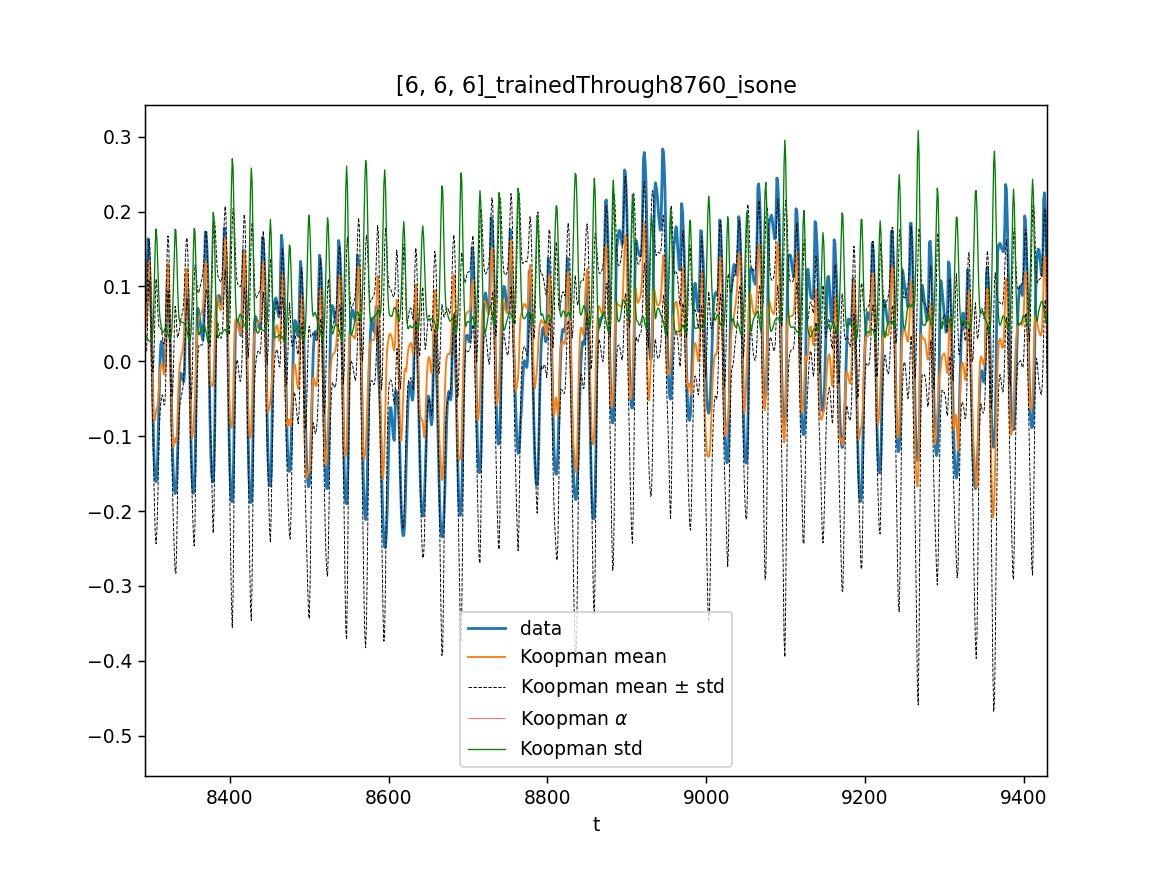

In [18]:
%matplotlib notebook

mean_hat = model.mean([mu_hat, sigma_hat, a_hat])
std_hat = model.std([mu_hat, sigma_hat, a_hat])
for dim in range(xt.shape[1]):
    plt.figure()
    # plt.scatter(np.arange(-slc), x[slc:], label="data")
    plt.plot(x[:predict_through, dim], label="data")
    plt.plot(mean_hat[:, dim], label="Koopman mean", linewidth=1)
    plt.plot(mean_hat[:, dim] + std_hat[:, dim], "--", color="black", label="Koopman mean $\pm$ std", linewidth=0.5)
    plt.plot(mean_hat[:, dim] - std_hat[:, dim], "--", color="black", linewidth=0.5)
    plt.plot(a_hat[:, dim], color="red", linewidth=0.3, label="Koopman $\\alpha$")
    plt.plot(std_hat[:, dim], color="green", linewidth=0.7, label="Koopman std")

    # plt.plot(mu_vec[slc:], label="real mu")
    # plt.plot(mu_hat[slc:, 0], label="koopman mu")
    # plt.legend()
    # plt.show()
    #
    # plt.plot(sigma_vec[slc:], label="real sigma")
    #     plt.plot(3*sigma_hat[:, dim], label="koopman $3\sigma$", linewidth=0.7)
    plt.title(f"{num_freqs}_trainedThrough{train_through}_" + data_name)
    plt.xlabel("t")
    plt.legend()
    plt.show()

In [139]:
k.omegas[7] = 2*np.pi / 5500

In [156]:
mu_hat = np.load("forecasts//energy_data_4mu.npy")
sigma_hat = np.load("forecasts//energy_data_4sigma.npy")

In [19]:
def normal_pdf(mu, sigma, x):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))/((2 * np.pi * sigma**2)**0.5)

In [20]:
z_scores = ((x[:predict_through] - mean_hat) / std_hat)[:8760, 0]
# z_scores /= np.std(z_scores)
z_hist, bin_edges = np.histogram(z_scores, bins=40, density=True)
z_axis = (bin_edges[1:] + bin_edges[:-1]) / 2

In [21]:
np.std(z_scores)

1.4633511657061222

<IPython.core.display.Javascript object>


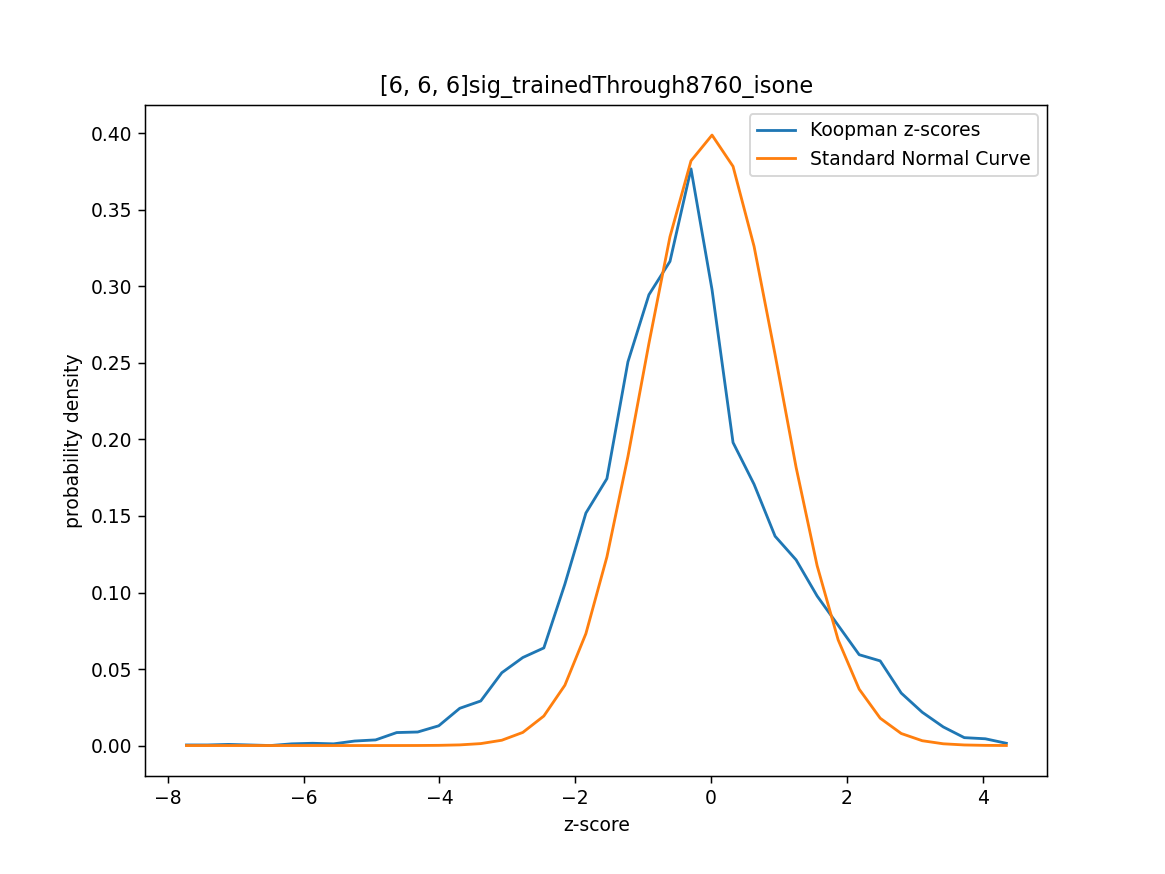

In [22]:
plt.figure()
plt.plot(z_axis, z_hist, label="Koopman z-scores")
plt.plot(z_axis, normal_pdf(0, 1, z_axis), label="Standard Normal Curve")
plt.title(f"{num_freqs}sig_trainedThrough{train_through}_" + data_name)
plt.xlabel("z-score")
plt.ylabel("probability density")
plt.legend()

# Pinball Loss

In [12]:
def pinball_loss(data, mus, sigmas, alphas, quantiles=range(10, 100, 10)):
    loss = 0
    for i in range(len(data)):
        for q in quantiles:
            q = q/100
            quant_pred = skewnorm.ppf(q, alphas[i], loc=mus[i], scale=sigmas[i])
            if quant_pred > data[i]:
                loss += (quant_pred - data[i]) * (1 - q)
            else:
                loss += (data[i] - quant_pred) * q
    return loss / (len(data) * len(quantiles))

<IPython.core.display.Javascript object>


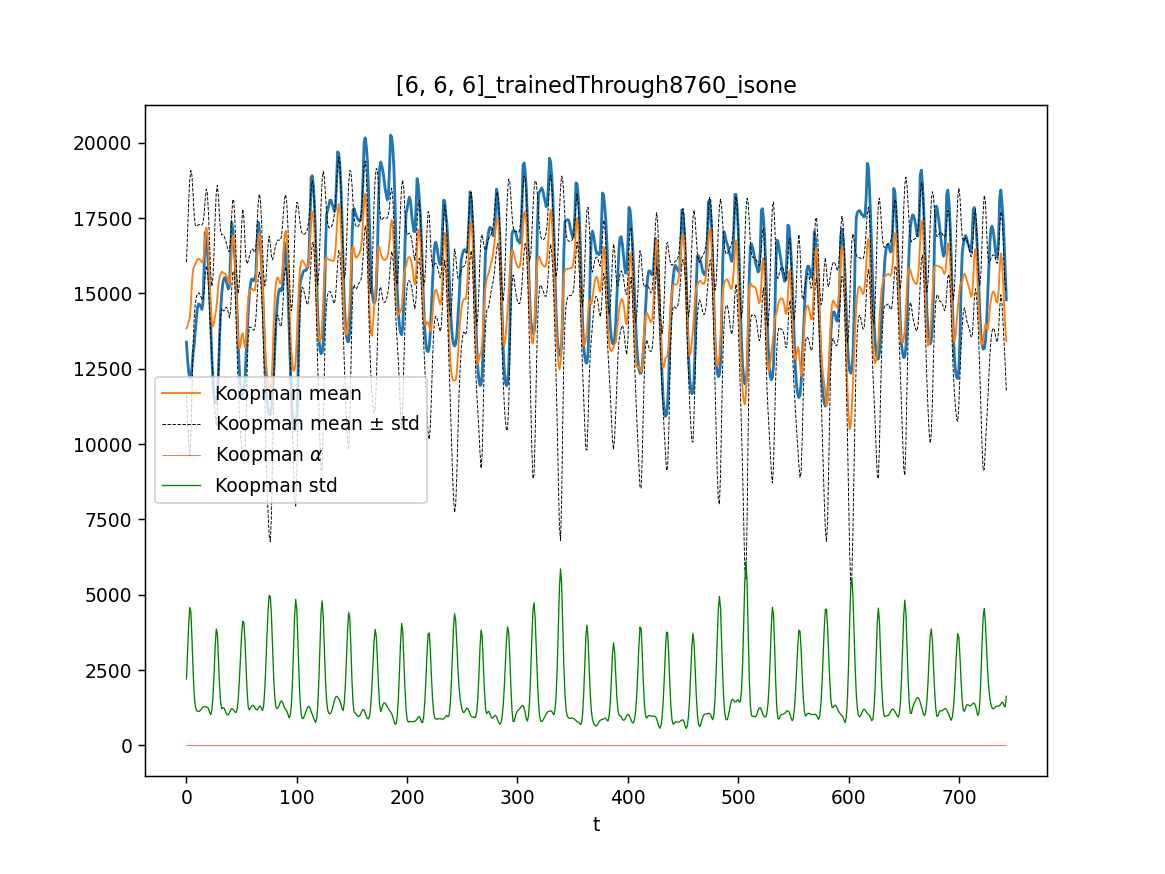

In [23]:
sigh, ah =  sigma_hat[train_through: predict_through], a_hat[train_through: predict_through]
delta = ah / (1 + ah ** 2) ** 0.5
muh = mu_hat[train_through: predict_through] * rnge + (rnge - 1) * delta * sigh * (2 / np.pi) ** 0.5
muh = muh + mean - (rnge - 1) * delta * sigh * (2 / np.pi) ** 0.5
sigh = sigh * rnge
mean_hat = model.mean([muh, sigh, ah])
std_hat = model.std([muh, sigh, ah])

plt.figure()
plt.plot(x_original[train_start:][train_through: predict_through])
plt.plot(mean_hat[:, dim], label="Koopman mean", linewidth=1)
plt.plot(mean_hat[:, dim] + std_hat[:, dim], "--", color="black", label="Koopman mean $\pm$ std", linewidth=0.5)
plt.plot(mean_hat[:, dim] - std_hat[:, dim], "--", color="black", linewidth=0.5)
plt.plot(ah[:, dim], color="red", linewidth=0.3, label="Koopman $\\alpha$")
plt.plot(std_hat[:, dim], color="green", linewidth=0.7, label="Koopman std")
plt.title(f"{num_freqs}_trainedThrough{train_through}_" + data_name)
plt.xlabel("t")
plt.legend()
plt.show()

In [28]:
loss = pinball_loss(x_original[train_start:][train_through: predict_through], muh, sigh, ah)
print(loss)

[468.77786307]


In [29]:
1 - loss / 655

array([0.28430861])

In [8]:
# Construct pdf quantiles
# REMOVE
# sigma = 1 * np.cos(2 * np.pi / 36 * np.arange(5000) + 1.5) + 4

num_quantiles = 100
domain = [min(mu_hat[:,0] - 2.5*sigma_hat[:, 0]), max(mu_hat[:,0] + 2.5*sigma_hat[:, 0])]
x_axis = np.linspace(domain[0], domain[1], num_quantiles)

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors

<IPython.core.display.Javascript object>


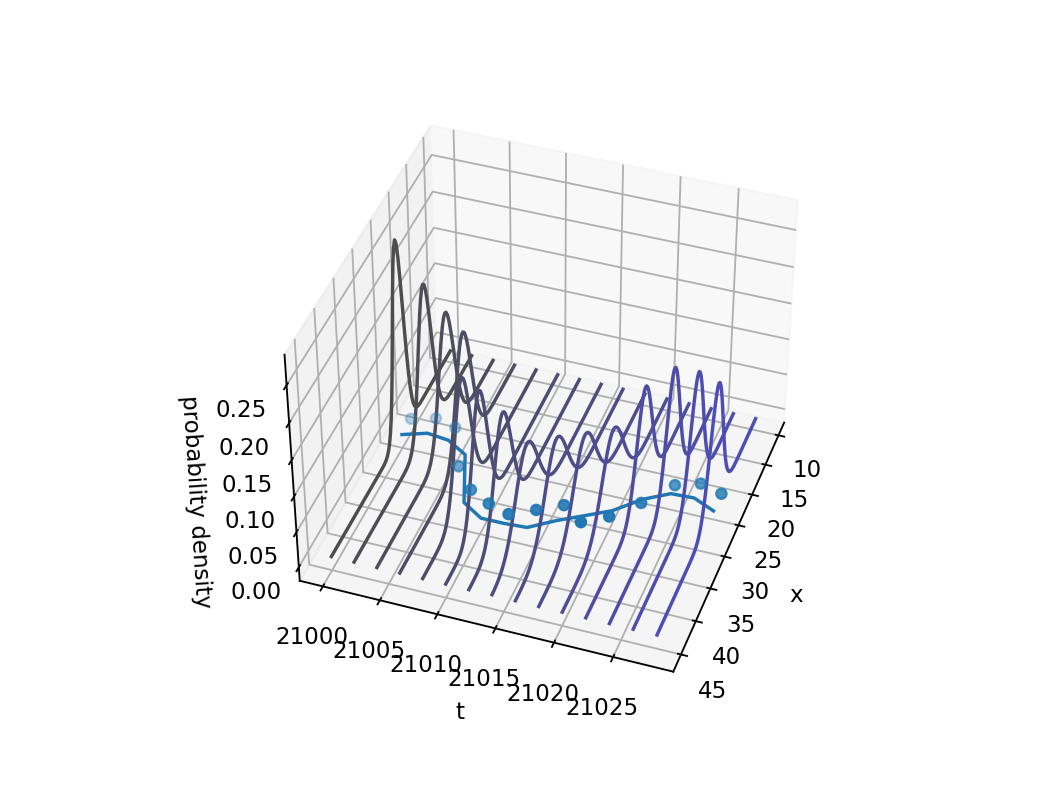

In [13]:
fig = plt.figure()
ax = fig.gca(projection='3d')

tmin = 21000
tmax = 21030
tstep = 2
ts = range(tmin, tmax, tstep)
plt.plot(mu_hat[tmin:tmax:tstep, 0], ts, np.zeros(len(ts)))
ax.scatter(x[tmin:tmax:tstep, 0], ts, np.zeros(len(ts)))

for i, t in enumerate(ts):
    z = normal_pdf(mu_hat[t], sigma_hat[t], x_axis)
    plt.plot(x_axis, t*np.ones(num_quantiles), z, color=(0.3, 0.3, 0.3 + 0.03*i))

plt.xlabel("x")
plt.ylabel("t")
ax.set_zlabel("probability density")


plt.show()

In [6]:
help(np.concatenate)

Help on function concatenate in module numpy:

concatenate(...)
    concatenate((a1, a2, ...), axis=0, out=None)
    
    Join a sequence of arrays along an existing axis.
    
    Parameters
    ----------
    a1, a2, ... : sequence of array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int, optional
        The axis along which the arrays will be joined.  If axis is None,
        arrays are flattened before use.  Default is 0.
    out : ndarray, optional
        If provided, the destination to place the result. The shape must be
        correct, matching that of what concatenate would have returned if no
        out argument were specified.
    
    Returns
    -------
    res : ndarray
        The concatenated array.
    
    See Also
    --------
    ma.concatenate : Concatenate function that preserves input masks.
    array_split : Split an array into multiple sub-arrays of equal or
   